# Import Libraries and Initial Plot

<Axes: >

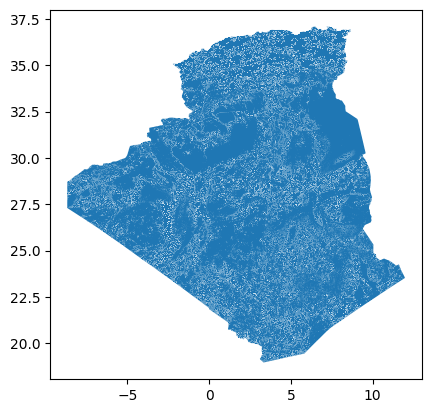

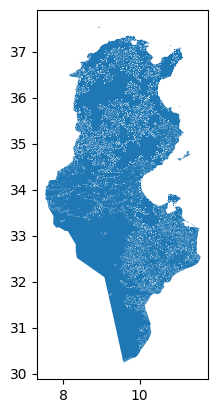

In [2]:
import geopandas as gpd
algeria_lc = gpd.read_file('..\\Land Cover dataset\\geonetwork_landcover_DZA_gc_adg\\dza_gc_adg.shp')
algeria_lc.plot()
tunisia_lc = gpd.read_file('..\\Land Cover dataset\\geonetwork_landcover_tun_gc_adg\\tun_gc_adg.shp')
tunisia_lc.plot()


# Load Land Cover Data

<Figure size 2000x1600 with 0 Axes>

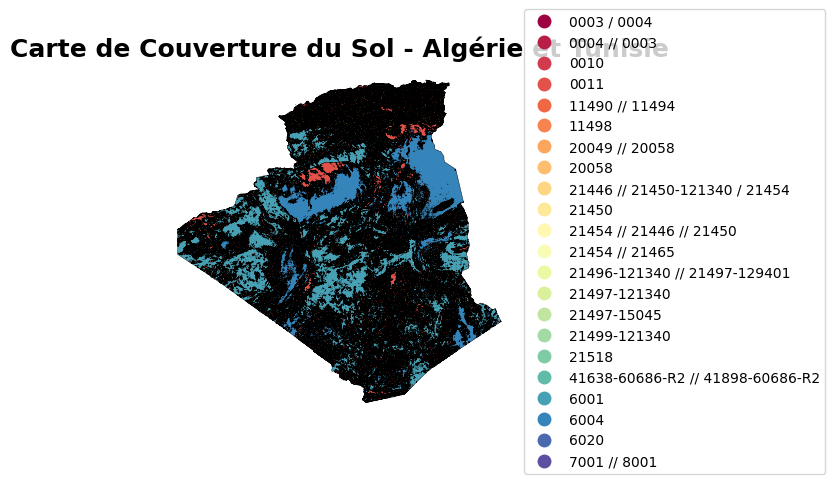

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

lc_all = gpd.GeoDataFrame(pd.concat([algeria_lc, tunisia_lc], ignore_index=True))

lc_all = lc_all.to_crs(algeria_lc.crs)
plt.figure(figsize=(20, 16))  
lc_all.plot(column='LCCCODE', 
            cmap='Spectral',  
            legend=True, 
            edgecolor='black',  
            linewidth=0.3,  
            legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5)}) 

plt.title('Carte de Couverture du Sol - Algérie et Tunisie', fontsize=18, fontweight='bold')
plt.axis('off')
plt.tight_layout()  
plt.show()

# Land Cover Analysis

                  ID       GRIDCODE          AREA       AREA_M2
count  438513.000000  438513.000000  4.385130e+05  5.205900e+04
mean   173378.294498     156.209934  5.659735e+06  2.981265e+06
std    117981.553876      65.661496  1.196408e+09  2.059695e+08
min         1.000000      14.000000  1.006631e+05  1.002300e+05
25%     57570.000000     150.000000  1.735023e+05  1.580740e+05
50%    167198.000000     200.000000  3.110183e+05  3.091400e+05
75%    276826.000000     200.000000  6.819345e+05  6.892255e+05
max    386454.000000     210.000000  6.734111e+11  3.470434e+10


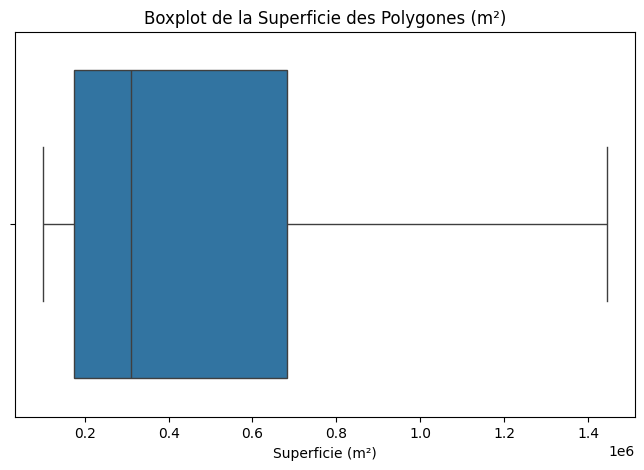

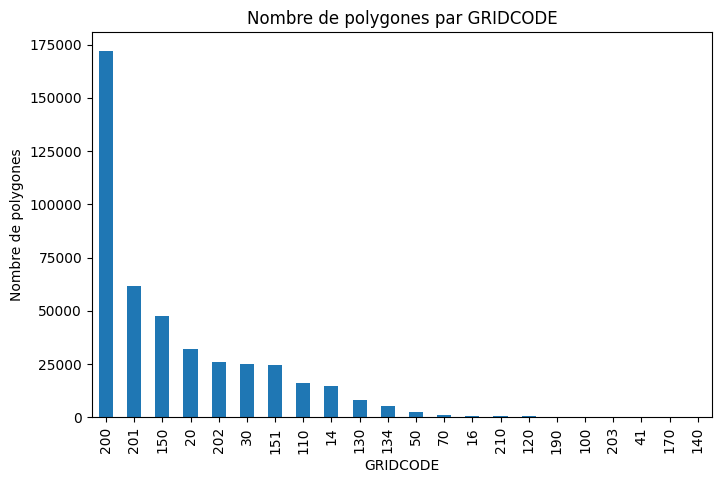

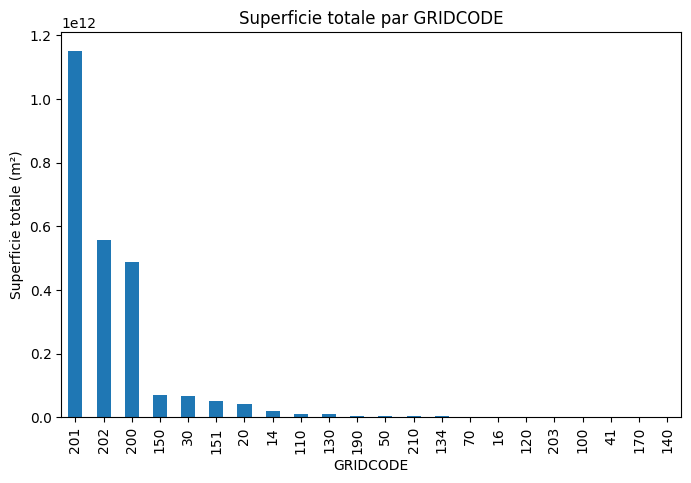

LCCCODE
0011              168143
6001               57050
20049 // 20058     39532
6004               25243
0003 / 0004        23115
Name: count, dtype: int64


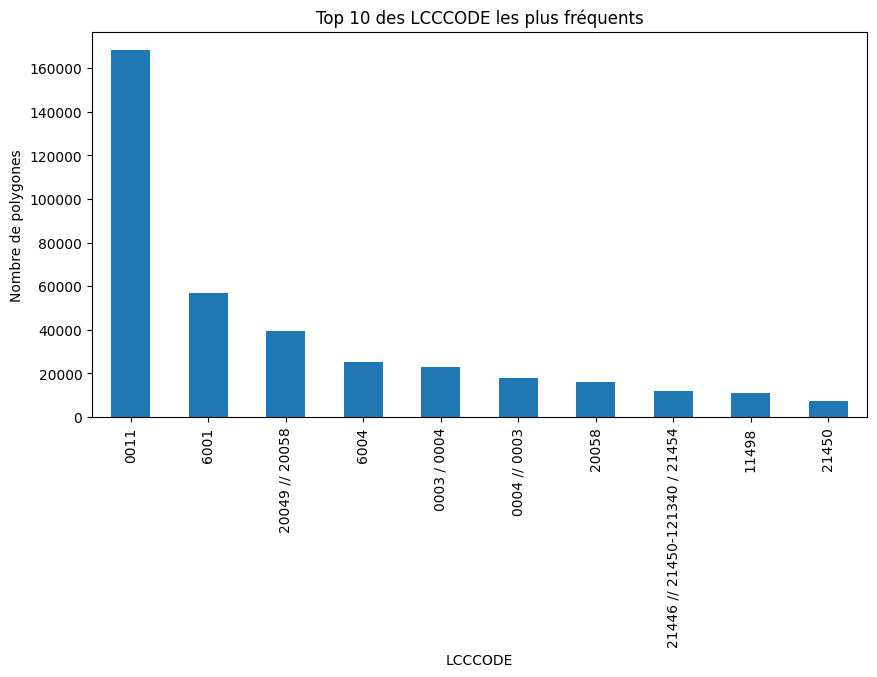

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

lc_all = lc_all.to_crs(epsg=32631)
lc_all["AREA"] = lc_all.geometry.area
print(lc_all.describe())

plt.figure(figsize=(8,5))
sns.boxplot(x=lc_all["AREA"],showfliers=False)
plt.title("Boxplot de la Superficie des Polygones (m²)")
plt.xlabel("Superficie (m²)")
plt.show()

plt.figure(figsize=(8,5))
lc_all["GRIDCODE"].value_counts().plot(kind="bar")
plt.title("Nombre de polygones par GRIDCODE")
plt.xlabel("GRIDCODE")
plt.ylabel("Nombre de polygones")
plt.show()


area_by_grid = lc_all.groupby("GRIDCODE")["AREA"].sum().sort_values(ascending=False)
area_by_grid.plot(kind="bar", figsize=(8,5))
plt.title("Superficie totale par GRIDCODE")
plt.xlabel("GRIDCODE")
plt.ylabel("Superficie totale (m²)")
plt.show()


lcc_counts = lc_all["LCCCODE"].value_counts()
print(lcc_counts.head())

lcc_counts.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 des LCCCODE les plus fréquents")
plt.xlabel("LCCCODE")
plt.ylabel("Nombre de polygones")
plt.show()


# Clean Land Cover Function

In [ ]:
def clean_landcover_shapefile(gdf):
  
    print(f"Nombre de polygones initial: {len(gdf)}")
    gdf_clean = gdf.copy()

    print("\nValeurs manquantes par colonne:")
    missing = gdf_clean.isnull().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "Aucune valeur manquante")

    before = len(gdf_clean)
    gdf_clean = gdf_clean[gdf_clean.geometry.notna()]
    print(f"\nGéométries nulles supprimées: {before - len(gdf_clean)}")

    before = len(gdf_clean)
    gdf_clean = gdf_clean[gdf_clean.geometry.is_valid]
    print(f"Géométries invalides supprimées: {before - len(gdf_clean)}")


    gdf_clean = gdf_clean.drop(["GRIDCODE"],axis=1)
    if 'LCCCODE' in gdf_clean.columns:
        before = len(gdf_clean)
        gdf_clean = gdf_clean.dropna(subset=['LCCCODE'])
        print(f"LCCCODE manquants supprimés: {before - len(gdf_clean)}")
        
        
        gdf_clean['LCCCODE'] = gdf_clean['LCCCODE'].str.strip() # supprimer les espaces
        
        before = len(gdf_clean)
        gdf_clean = gdf_clean[gdf_clean['LCCCODE'] != '']
        print(f"LCCCODE vides supprimés: {before - len(gdf_clean)}")    
    gdf_clean = gdf_clean.reset_index(drop=True)
    
    print(f"\n{'='*50}")
    print(f"Polygones après nettoyage: {len(gdf_clean)}")
    print(f"Polygones supprimés: {len(gdf) - len(gdf_clean)}")
    print(f"Pourcentage conservé: {len(gdf_clean)/len(gdf)*100:.2f}%")

    return gdf_clean
gdf_clean=clean_landcover_shapefile(lc_all)
gdf_clean.to_file('..\\Land Cover dataset\\merged_DZA_TUN_cleaned.shp')
